# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing Dataset

In [2]:
data=pd.read_csv(r"C:\Users\samee\Desktop\datasets\abc.csv")
data

outlook  temp humidity  windy play
0    rainy   hot     high  False  Yes
1    rainy   hot     high   True   No
2    sunny   hot     high  False  Yes
3    sunny  cool     high  False   No
4    sunny   hot   normal  False  Yes
5    sunny  cool   normal   True  Yes
6    rainy  cool   normal   True   No
7    rainy   hot     high  False   No
8    rainy  cool   normal  False  Yes
9    sunny  cool   normal  False  Yes
10   rainy  cool   normal   True   No
11   sunny   hot     high   True   No
12   rainy   hot   normal  False  Yes
13   sunny   hot     high   True   No

# selecting the columns

In [3]:
x=data.iloc[:,0:4].values
y=data.iloc[:,4:].values
print(x)
print(y)

[['rainy' 'hot' 'high' False]
 ['rainy' 'hot' 'high' True]
 ['sunny' 'hot' 'high' False]
 ['sunny' 'cool' 'high' False]
 ['sunny' 'hot' 'normal' False]
 ['sunny' 'cool' 'normal' True]
 ['rainy' 'cool' 'normal' True]
 ['rainy' 'hot' 'high' False]
 ['rainy' 'cool' 'normal' False]
 ['sunny' 'cool' 'normal' False]
 ['rainy' 'cool' 'normal' True]
 ['sunny' 'hot' 'high' True]
 ['rainy' 'hot' 'normal' False]
 ['sunny' 'hot' 'high' True]]
[['Yes']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']]


# Handling Null Values

In [4]:
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

# Converting categorical values into Numerical values

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])
x[:,1]=le.fit_transform(x[:,1])
x[:,2]=le.fit_transform(x[:,2])
x[:,3]=le.fit_transform(x[:,3])
x

array([[0, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 1, 0],
       [1, 0, 1, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 1, 0, 1],
       [0, 1, 1, 0],
       [1, 1, 0, 1]], dtype=object)

# splitting the training and testing data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [7]:
x_train

array([[0, 0, 1, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 1]], dtype=object)

# Building a model

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [9]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# predicting the Test data

In [10]:
dtc.predict(x_test)

array(['Yes', 'No', 'No', 'Yes', 'No'], dtype=object)

In [11]:
dtc.predict([[1,0,0,1]])

array(['No'], dtype=object)

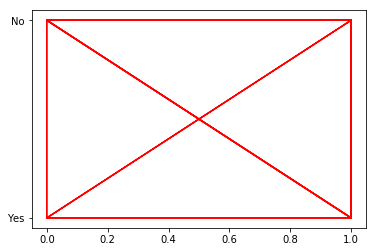

In [21]:
plt.plot(x_train,dtc.predict(x_train),color='red')